# Задача 2

Задана задача Коши:
------------------
$$\frac{du}{dt} = \frac{1}{1 - ucos(t)}, -1.5 < t < 0.55$$
$$u(-1.5) = 0$$

Проверить по определению устойчивость явного метода для данной задачи Коши:

$$u_{n+1} - u_{n-1} = \tau(f(t_n, u_n) + f(t_{n-1}, u_{n-1}))$$
-----------------------------------------------------------------------------------


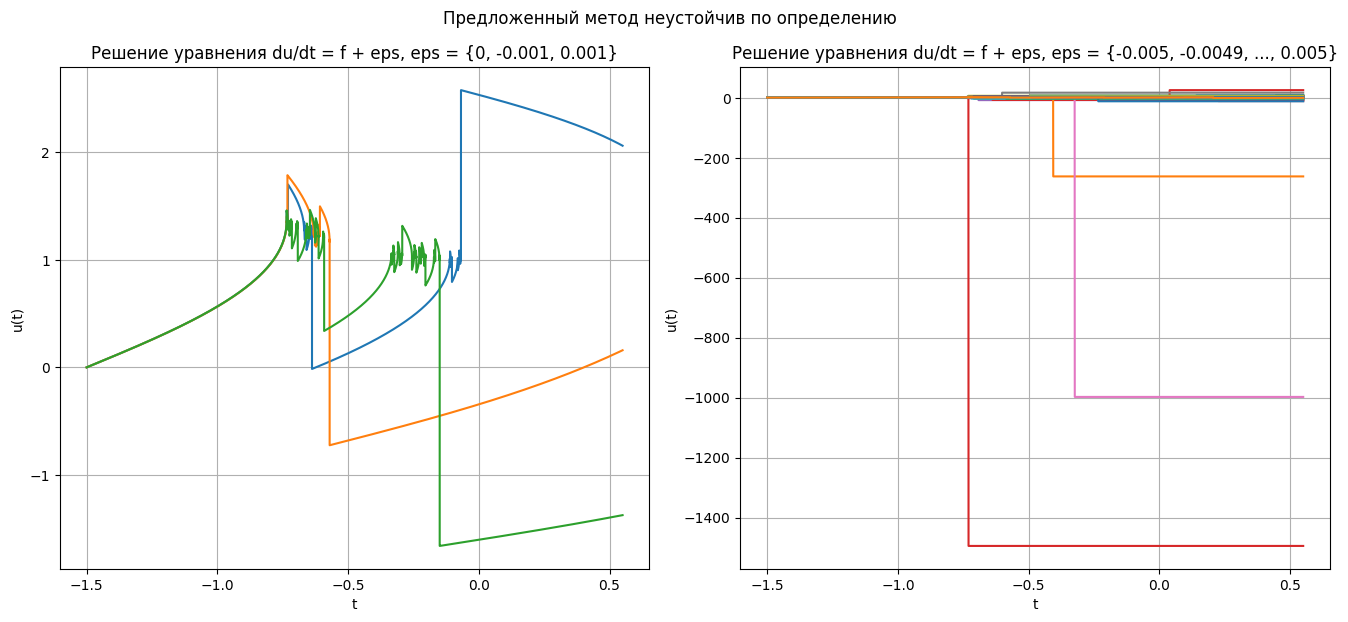

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

def f(t, u, eps):
    return 1 / (1 - u * math.cos(t)) + eps

def main():
    h = 10**-4
    l = -1.5
    s = 0
    r = 0.55
    t = np.arange(l, r, h)
    n = len(t)
    u = []
    plt.figure(figsize = (13.5, 6.3))
    plt.suptitle("Предложенный метод неустойчив по определению")
    plt.subplot(1, 2, 1)
    plt.title("Решение уравнения du/dt = f + eps, eps = {0, -0.001, 0.001}")
    e = [0, -0.001, 0.001]
    for eps in e:
        u = Solve(t, n, h, f, eps, s)
        plt.plot(t, u)
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.tight_layout()
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Решение уравнения du/dt = f + eps, eps = {-0.005, -0.0049, ..., 0.005}")
    e = np.arange(-0.005, 0.0051, 0.0001)
    for eps in e:
        u = Solve(t, n, h, f, eps, s)
        plt.plot(t, u)
    plt.xlabel("t")
    plt.ylabel("u(t)")
    plt.tight_layout()
    plt.grid()
    plt.show()

def Solve(t, n, h, f, eps, s):
    u = [s] #u0 задача Коши
    u.append(u[0] + h * f(t[0], u[0], eps)) #u1 по явной схеме Эйлера
    for i in range(n - 2):
        u.append(Next(u[-2], u[-1], t[i], t[i + 1], h, f, eps))
    u = np.asarray(u)
    return u

def Next(u_, u, t_, t, h, f, eps):
    return u_ + h * (f(t, u, eps) + f(t_, u_, eps))

if __name__ == "__main__":
    main()